#**DEP (Task 2)**



---


# **Objective**


---

**The objective is to build a predictive model that estimates house prices based on various features of the houses. By leveraging a dataset containing information about houses e.g area,number of bedrooms, number of bathrooms, stories, basement, parking space, preffered area and furnishing status, the goal is to create a model that can predict the price of a house.**




---


# ***Data Exploration***


---



### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### **Loading the dataset**

In [ ]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### **Displaying header data**

In [ ]:
df.head(0)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


### **Displaying Column Labels**

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')



---


# ***Data Cleaning And Preprocessing***


---



###**Counting Number of Missing Value**

In [ ]:
missing_values = df.isnull().sum()
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### **Dropping the Duplicates**

In [ ]:
df.drop_duplicates(inplace = True)




---


# ***Feature Engineering***


---



In [ ]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['area_per_room'] = df['area'] / df['total_rooms']



---


# ***Model Selection And Training***


---



### **Defining Features And Target**

In [ ]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
target = 'price'

### **Encoding categorical Features**

In [ ]:
df_encoded = pd.get_dummies(df[features], drop_first = True)

### **Train - Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df[target], test_size = 0.4, random_state = 42)


### **Initializing the Model**

In [ ]:
model = LinearRegression()

### **Training the Model**

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

### **Making Predictions**

In [ ]:
y_pred = model.predict(X_test)



---


# ***Model Evaluation And Fine-Tuning***


---



In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

### **Visualization Actual vs Predicted House Prices**

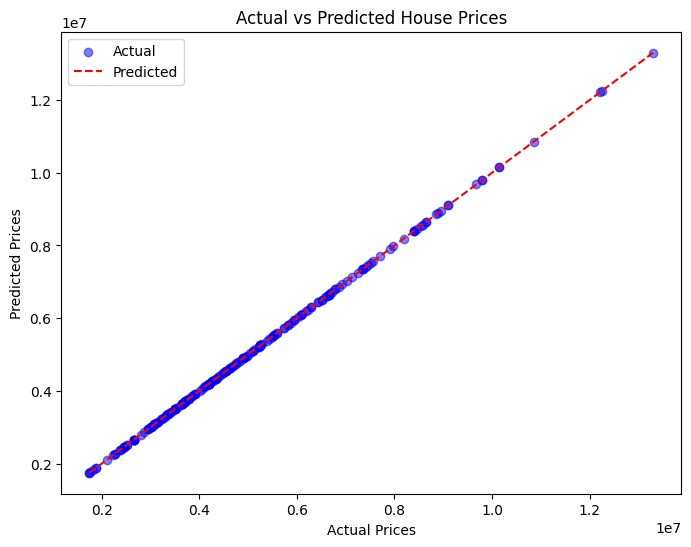

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.5, label = 'Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '--', color = 'red', label = 'Predicted')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()